In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/mobile_price_classification.csv')

In [3]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.shape

(2000, 21)

In [5]:
data.dtypes

battery_power       int64
bluetooth           int64
clock_speed       float64
dual_sim            int64
front_cam           int64
4G                  int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
primary_camera      int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range         int64
dtype: object

In [6]:
data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [7]:
data['price_range'].value_counts()


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [8]:
x = data.drop('price_range', axis = 1)
y = data['price_range']

In [9]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
#Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x.loc[:,['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi',]] = sc.fit_transform(x[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi',]])

In [12]:
#test train split

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 42)

In [14]:
#creating a neural network based classifier

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(10,activation = 'relu'))
model.add(Dense(4,activation ='softmax'))

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'],run_eagerly=True)

In [18]:
history = model.fit(x_train,y_train,epochs = 100, verbose = 1 )

Epoch 1/100
50/50 [==============================] - 1s 17ms/step - loss: 1.4821 - accuracy: 0.3344
Epoch 2/100
50/50 [==============================] - 1s 22ms/step - loss: 1.3796 - accuracy: 0.3700
Epoch 3/100
50/50 [==============================] - 1s 28ms/step - loss: 1.3028 - accuracy: 0.3988
Epoch 4/100
50/50 [==============================] - 1s 29ms/step - loss: 1.2366 - accuracy: 0.4363
Epoch 5/100
50/50 [==============================] - 1s 29ms/step - loss: 1.1761 - accuracy: 0.4725
Epoch 6/100
50/50 [==============================] - 2s 35ms/step - loss: 1.1177 - accuracy: 0.5050
Epoch 7/100
50/50 [==============================] - 2s 38ms/step - loss: 1.0611 - accuracy: 0.5381
Epoch 8/100
50/50 [==============================] - 3s 51ms/step - loss: 1.0036 - accuracy: 0.5600
Epoch 9/100
50/50 [==============================] - 2s 43ms/step - loss: 0.9473 - accuracy: 0.5925
Epoch 10/100
50/50 [==============================] - 2s 35ms/step - loss: 0.8917 - accuracy: 0.6231

In [19]:
y_pred = model.predict(x_test)

13/13 [==============================] - 0s 3ms/step


In [20]:
y_pred

array([[9.7746855e-01, 2.2531400e-02, 8.1600469e-09, 2.8738023e-10],
       [1.8493498e-07, 2.2477325e-02, 9.7737461e-01, 1.4780943e-04],
       [3.9791167e-03, 9.9494106e-01, 1.0794329e-03, 3.4772401e-07],
       ...,
       [3.1479922e-04, 9.8139375e-01, 1.8290432e-02, 1.0123147e-06],
       [1.6647604e-03, 9.7896796e-01, 1.9339269e-02, 2.8052767e-05],
       [1.8885344e-09, 8.8202150e-04, 9.9571443e-01, 3.4035782e-03]],
      dtype=float32)

In [21]:
#Accuracy

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))



In [24]:
accuracy_score(y_test,pred)

0.9675

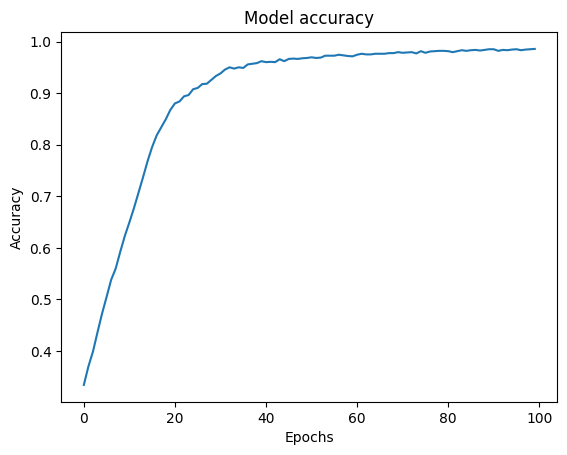

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()